In [ ]:
!pip install --upgrade transformers torch sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 434.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 612.4/906.4 MB 37.9 MB/s eta 0:00:08
ERROR: Operation cancelled by user


In [ ]:
from tqdm import tqdm
from google.colab import drive
import pandas as pd
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/data/processed/random_selected_articles_summaries_gpt.csv'
df = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from sentence_transformers import SentenceTransformer, util

# Load the BART model and tokenizer for summarization
bart_model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(bart_model_name)
model = BartForConditionalGeneration.from_pretrained(bart_model_name)

# Load the SentenceTransformer model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def calculate_similarity(article, summary):
    # Compute embeddings for both article and summary
    embeddings = similarity_model.encode([article, summary])

    # Calculate cosine similarity
    cosine_similarity = util.cos_sim(embeddings[0], embeddings[1])
    return cosine_similarity.item()


# Initialize a list to store results
results = []

# Loop through the first 10 articles and calculate similarity scores
for _, row in tqdm(df.iterrows()):
    article = row['cleaned_article']
    summary = row['summary']

    # Calculate similarity
    similarity_score = calculate_similarity(article, summary)

    # Append the results to the list
    results.append({
        "Provided Summary": summary,
        "Similarity Score": similarity_score
    })

# Convert the results to a DataFrame for better display
results_df = pd.DataFrame(results)

# Display the results in tabular format
print(results_df)

293it [01:58,  2.47it/s]

                                      Provided Summary  Similarity Score
0    Poland’s recent near-total abortion ban has dr...          0.690621
1    In his message for Pro-Life Day 2020, Cardinal...          0.549866
2    Sex education in the Philippines is aimed at e...          0.877565
3    Jillaine St. Michel, a 37-year-old Idaho resid...          0.528554
4    The policy brief from Action Canada for Sexual...          0.833866
..                                                 ...               ...
288  Pueblo City Council’s recent decision to indef...          0.797928
289  Pueblo City Council’s recent decision to indef...          0.960047
290  Following the Supreme Court’s overturning of R...          0.652022
291  Indiana’s six abortion clinics have ceased per...          0.453636
292  A University of Nottingham midwifery student, ...          0.693066

[293 rows x 2 columns]


In [ ]:
display(results_df)

,Provided Summary,Similarity Score
0,Poland’s recent near-total abortion ban has dr...,0.690621
1,"In his message for Pro-Life Day 2020, Cardinal...",0.549866
2,Sex education in the Philippines is aimed at e...,0.877565
3,"Jillaine St. Michel, a 37-year-old Idaho resid...",0.528554
4,The policy brief from Action Canada for Sexual...,0.833866
...,...,...
288,Pueblo City Council’s recent decision to indef...,0.797928
289,Pueblo City Council’s recent decision to indef...,0.960047
290,Following the Supreme Court’s overturning of R...,0.652022
291,Indiana’s six abortion clinics have ceased per...,0.453636


from matplotlib import pyplot as plt
results_df['Similarity Score'].plot(kind='hist', bins=20, title='Similarity Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Similarity Score'].plot(kind='line', figsize=(8, 4), title='Similarity Score')
plt.gca().spines[['top', 'right']].set_visible(False)

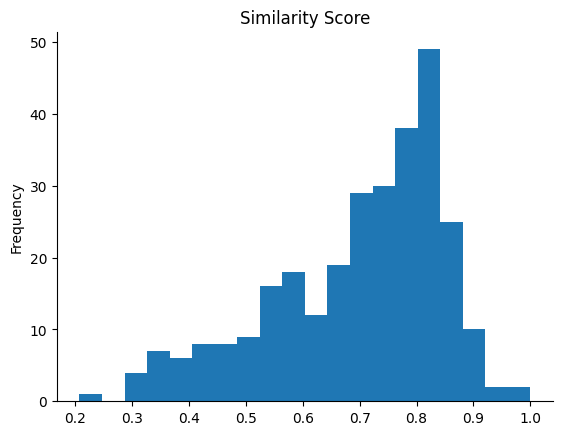

In [ ]:
from matplotlib import pyplot as plt
results_df['Similarity Score'].plot(kind='hist', bins=20, title='Similarity Score')
plt.gca().spines[['top', 'right',]].set_visible(False)